데이터 길이: 365 
앞쪽 5개 값: [[8818.6]
 [8800.3]
 [9317.2]
 [9662.7]
 [9942.7]]


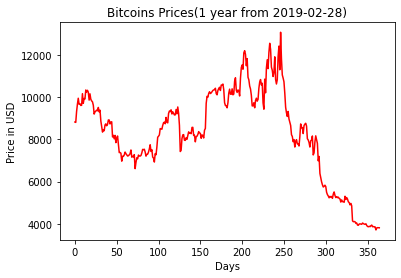

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f=open('bit-coin.csv','r',encoding='euc-kr')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['종가']].to_numpy()
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

plt.plot(seq,color='red')
plt.title('Bitcoins Prices(1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

In [7]:
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])


(358, 7, 1) (358, 1)
[[8818.6]
 [8800.3]
 [9317.2]
 [9662.7]
 [9942.7]
 [9655.7]
 [9684.5]] [9602.4]
[[3875.1]
 [3863. ]
 [3857.2]
 [3715.9]
 [3809.5]
 [3823.1]
 [3821.9]] [3816.6]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f=open('bit-coin.csv','r',encoding='euc-kr')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['종가']].to_numpy()

def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w=7
h=1

X,Y=seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

split = int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0], "MAE:",ev[1])

pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title("Model mae")
plt.ylabel("mae")
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices', 'Predicted prices'],loc='best')
plt.grid()
plt.show()

x_range=range(50,64)
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices', 'Predicted prices'],loc='best')
plt.grid()
plt.show()


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-25 10:26:56.171267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-25 10:26:56.171934: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/200


2022-05-25 10:26:56.538057: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-25 10:26:56.918063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 10:27:05.961192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 - 10s - loss: 1261.2607 - mae: 1261.2607 - val_loss: 350.1370 - val_mae: 350.1370 - 10s/epoch - 41ms/step
Epoch 2/200
250/250 - 8s - loss: 593.8024 - mae: 593.8024 - val_loss: 372.3417 - val_mae: 372.3417 - 8s/epoch - 34ms/step
Epoch 3/200
250/250 - 8s - loss: 547.2980 - mae: 547.2980 - val_loss: 352.2528 - val_mae: 352.2528 - 8s/epoch - 34ms/step
Epoch 4/200
250/250 - 9s - loss: 539.6944 - mae: 539.6944 - val_loss: 285.0411 - val_mae: 285.0411 - 9s/epoch - 36ms/step
Epoch 5/200
250/250 - 9s - loss: 552.7271 - mae: 552.7271 - val_loss: 300.4792 - val_mae: 300.4792 - 9s/epoch - 34ms/step
Epoch 6/200
250/250 - 9s - loss: 509.0364 - mae: 509.0364 - val_loss: 291.3450 - val_mae: 291.3450 - 9s/epoch - 34ms/step
Epoch 7/200
250/250 - 9s - loss: 489.2196 - mae: 489.2196 - val_loss: 413.6320 - val_mae: 413.6320 - 9s/epoch - 37ms/step
Epoch 8/200
250/250 - 9s - loss: 537.8146 - mae: 537.8146 - val_loss: 258.6250 - val_mae: 258.6250 - 9s/epoch - 35ms/step
Epoch 9/200
250/250 - 9s - loss:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f=open('bit-coin.csv','r',encoding='euc-kr')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['종가','오픈','고가','저가']].to_numpy()

def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w=7
h=1

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

split = int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0], "MAE:",ev[1])

pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title("Model mae")
plt.ylabel("mae")
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
